In [1]:
import math
import random
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import re
from collections import namedtuple
from itertools import count
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as T

In [2]:
#Settings
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [3]:
#Read the preprocessed Data
filepath = './CICIDS2017_preprocessed'
dataset = pd.read_csv(filepath)

In [4]:
Label_binary = dataset['Label_binary'].values
data = dataset.drop(['Label_binary'], axis=1).values
print(data.shape)

(2830743, 20)


In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data,Label_binary,test_size=0.3,random_state=4)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [7]:
import tensorflow as tf
tf.keras.backend.set_floatx('float64')

In [8]:
model = Sequential()

model.add(Dense(20,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
opt = SGD(lr = 0.001, momentum=0.9)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

In [9]:
model.fit(x=X_train,y=y_train,epochs =15,validation_data=(X_test,y_test),verbose=1)

Epoch 1/15
61923/61923 [==============================] - 45s 731us/step - loss: 0.3363 - accuracy: 0.8703 - val_loss: 0.2552 - val_accuracy: 0.8846
Epoch 2/15
61923/61923 [==============================] - 42s 671us/step - loss: 0.2081 - accuracy: 0.9117 - val_loss: 0.1732 - val_accuracy: 0.9241
Epoch 3/15
61923/61923 [==============================] - 42s 682us/step - loss: 0.1511 - accuracy: 0.9333 - val_loss: 0.1380 - val_accuracy: 0.9423
Epoch 4/15
61923/61923 [==============================] - 40s 646us/step - loss: 0.1290 - accuracy: 0.9436 - val_loss: 0.1242 - val_accuracy: 0.9429
Epoch 5/15
61923/61923 [==============================] - 38s 609us/step - loss: 0.1201 - accuracy: 0.9468 - val_loss: 0.1204 - val_accuracy: 0.9472
Epoch 6/15
61923/61923 [==============================] - 38s 617us/step - loss: 0.1153 - accuracy: 0.9485 - val_loss: 0.1139 - val_accuracy: 0.9455
Epoch 7/15
61923/61923 [==============================] - 38s 617us/step - loss: 0.1119 - accuracy: 0.9496

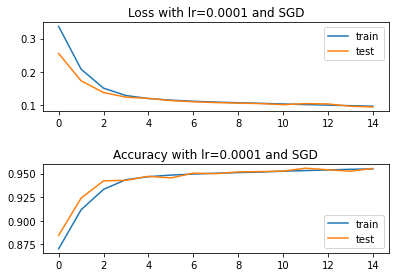

In [10]:
from matplotlib import pyplot as plt
pyplot.subplot(211)
pyplot.title('Loss with lr=0.0001 and SGD')
pyplot.plot(model.history.history['loss'], label='train')
pyplot.plot(model.history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy with lr=0.0001 and SGD')
pyplot.plot(model.history.history['accuracy'], label='train')
pyplot.plot(model.history.history['val_accuracy'], label='test')
pyplot.legend()
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.6)
pyplot.show()

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [14]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [17]:
cm = confusion_matrix(y_test, predictions)

In [18]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign","Attack"])

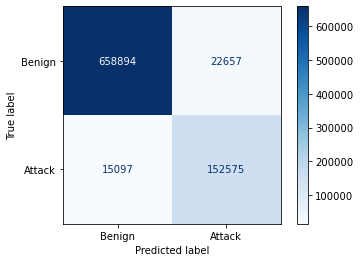

In [19]:
disp.plot(cmap=plt.cm.Blues)
plt.show()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                420       
_________________________________________________________________
dense_1 (Dense)              (None, 40)                840       
_________________________________________________________________
dense_2 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 41        
Total params: 2,941
Trainable params: 2,941
Non-trainable params: 0
_________________________________________________________________
None


<AxesSubplot:>

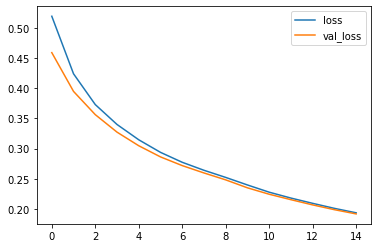

In [11]:
print(model.summary())
losses = pd.DataFrame({'loss':model.history.history['loss'],'val_loss':model.history.history['val_loss']})
losses.plot()

In [ ]:
   ''' 
    def get_reward(self, action, true_label):
        reward=[]
        print(type(action),type(true_label))
        print(true_label)
        for p, t in zip(action,true_label): #0=benign 1=Attack
            if p==1 and t==1:
                reward.append(+10) #positive high reward because classification is valid
            elif p==0 and t==1:
                reward.append(-10) #negative high reward because classification is not valid
            elif p==1 and t==0:
                reward.append(-5)  #negative low reward because classification is 
            else:
                reward.append(+5) #negative reward as result is misclassified, only condition left is p=0 and t=0
        return reward'''